In [1]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

In [2]:
def normalize_histogram(hist):
    return np.asarray(hist) / np.sum(hist)

In [3]:
def create_transformer_histogram(hist, L=256):
    norm_hist = normalize_histogram(hist)
    s = (L - 1) * np.cumsum(norm_hist)
    
    return s.round().astype(int)

In [4]:
def equalize_histogram(hist, L=256):
    s = create_transformer_histogram(hist, L)
    eq_hist = np.zeros(hist.shape)

    np.add.at(eq_hist, s.astype(int), hist)
    
    return eq_hist

In [5]:
def equalize_image(img, L=256):
    s = create_transformer_histogram(img.histogram(), L)

    arr_img = np.asarray(img)
    eq_img = s[arr_img]
    
    return eq_img

In [6]:
def create_histogram_matching(in_hist, out_hist, L=256):
    s = create_transformer_histogram(in_hist, L)
    G = create_transformer_histogram(out_hist, L)

    diff = np.abs(s[:, np.newaxis] - G)

    return np.argmin(diff, axis=1)

In [7]:
def match_histogram_image(input_img, hist_spec, L=256):
    #G = create_transformer_histogram(hist_spec, L)
    #eq_input_img = equalize_image(input_img, L)
    mapper = create_histogram_matching(input_img.histogram(), hist_spec, L)
    
    #matched_img = G[eq_input_img]
    matched_img = mapper[input_img]

    return matched_img

#### Testing

In [8]:
hist = np.array([790, 1023, 850, 656, 329, 245, 122, 81])
p = np.array([0.19, 0.25, 0.21, 0.16, 0.08, 0.06, 0.03, 0.02])
L = len(hist)

s = create_transformer_histogram(hist, L)
print('Transformed value:', s)

eq_hist = equalize_histogram(hist, L)
print('Equalized histogram:', eq_hist)
print('Normalized equalized histogram:', normalize_histogram(eq_hist))

Transformed value: [1 3 5 6 6 7 7 7]
Equalized histogram: [   0.  790.    0. 1023.    0.  850.  985.  448.]
Normalized equalized histogram: [0.         0.19287109 0.         0.24975586 0.         0.20751953
 0.24047852 0.109375  ]


In [9]:
p_z = np.array([0., 0., 0., 0.15, 0.20, 0.30, 0.20, 0.15 ])
out_hist = (p_z * 64 * 64).astype(int)
G = create_transformer_histogram(out_hist, L)

print('Desired transformed value:', G)
print('Transformed value:', s)

create_histogram_matching(hist, out_hist, L)

Desired transformed value: [0 0 0 1 2 5 6 7]
Transformed value: [1 3 5 6 6 7 7 7]


array([3, 4, 5, 6, 6, 7, 7, 7], dtype=int64)

### Muatkan Gambar

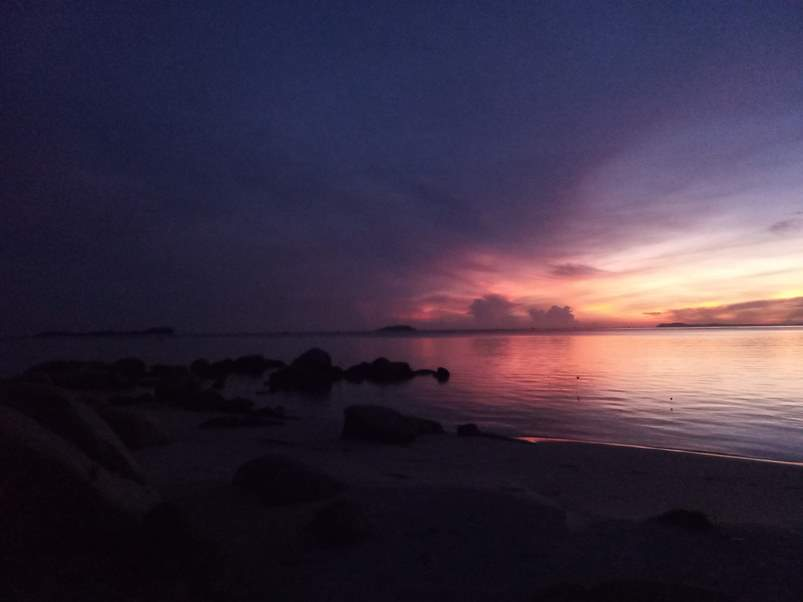

In [10]:
img = Image.open('./pantai.jpg')
img

### Ekualisasi Histogram

#### Abu-Abu

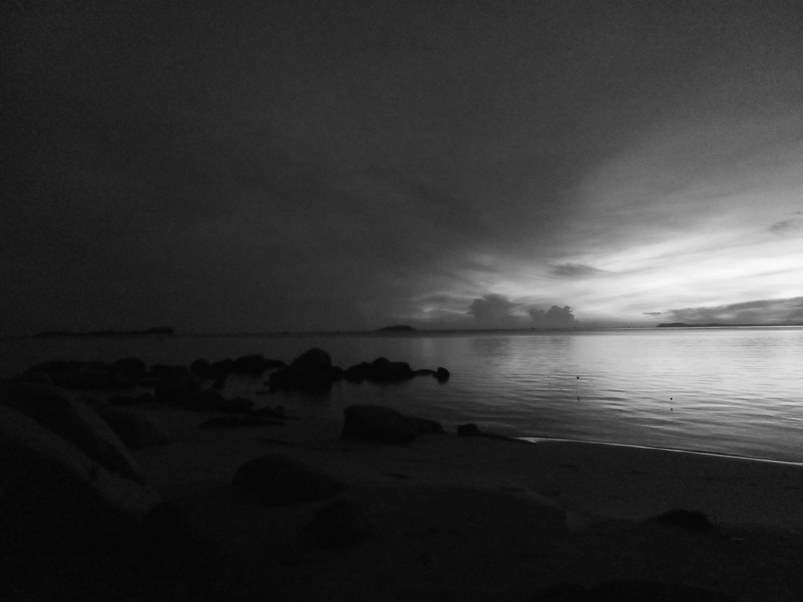

In [11]:
grey_img = img.convert('L')
grey_img

(602, 803)


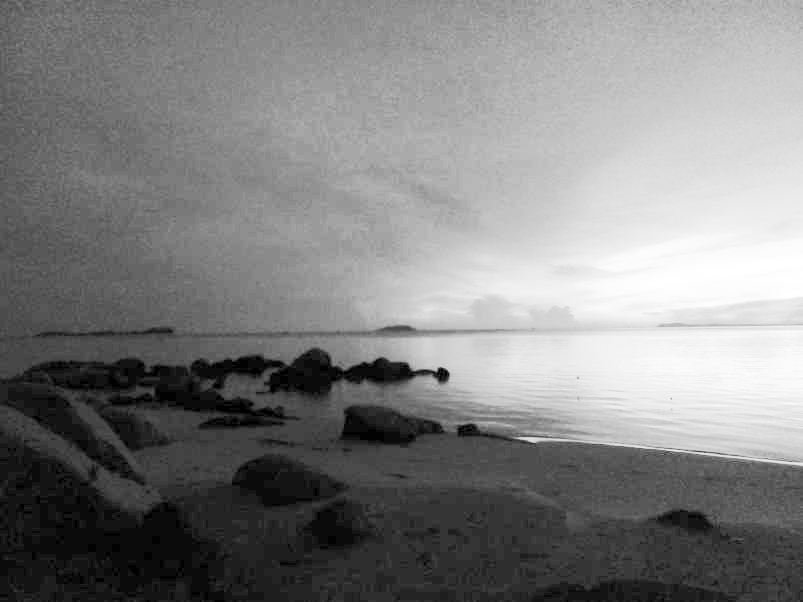

In [12]:
eq_grey_img = equalize_image(grey_img)
print(eq_grey_img.shape)
Image.fromarray(eq_grey_img.astype('uint8'), 'L')

Text(0.5, 1.0, 'Grey Equalized Histogram')

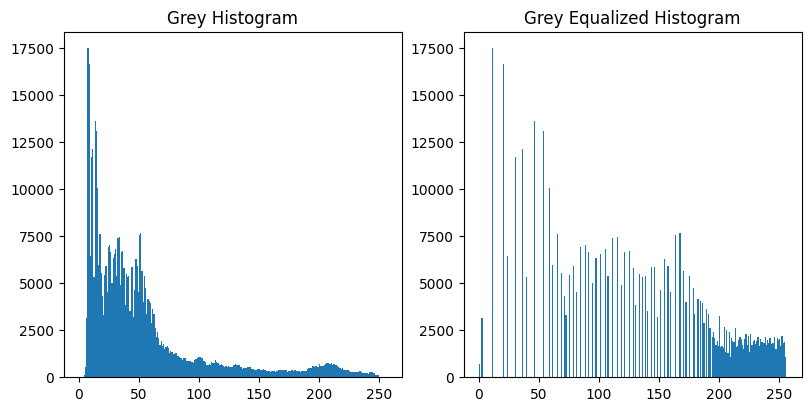

In [13]:
grey_hist = np.asarray(grey_img.histogram())

fig, ax = plt.subplots(ncols=2, figsize=(8, 4), layout='constrained')

ax[0].stairs(grey_hist, fill=True)
ax[0].set_title('Grey Histogram')

eq_grey_hist = equalize_histogram(grey_hist)
ax[1].stairs(eq_grey_hist, fill=True)
ax[1].set_title('Grey Equalized Histogram')

#### RGB

(602, 803, 3)


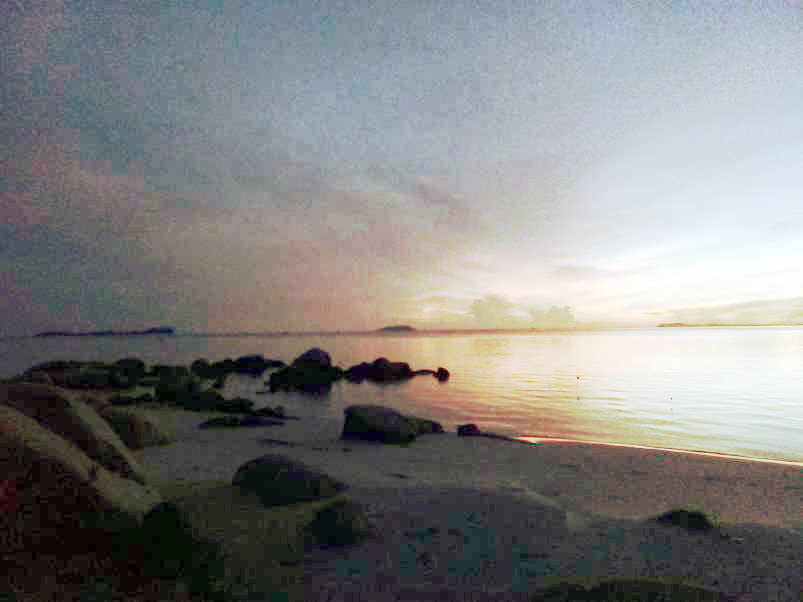

In [14]:
rgb_img = [
    img.getchannel('R'),
    img.getchannel('G'),
    img.getchannel('B')
]

eq_rgb_img = np.array([equalize_image(img).T for img in rgb_img]).T
print(eq_rgb_img.shape)

Image.fromarray(eq_rgb_img.astype('uint8'), 'RGB')

Text(0.5, 1.0, 'Blue Equalized')

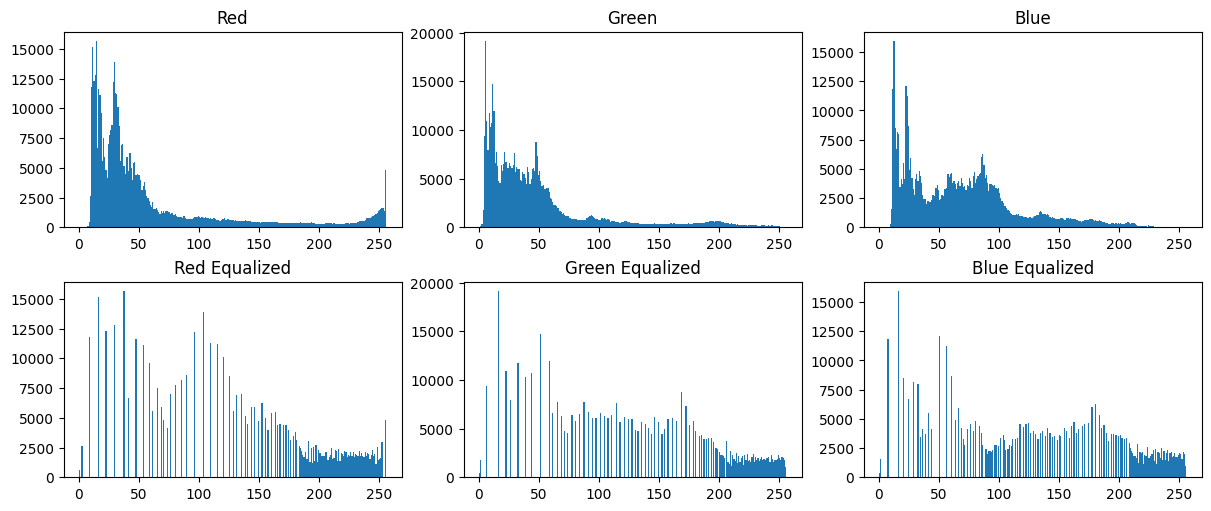

In [15]:
r_hist = np.array(img.histogram()[:256])
g_hist = np.array(img.histogram()[256:512])
b_hist = np.array(img.histogram()[512:])

fig, ax = plt.subplots(2, 3, figsize=(12, 5), layout='constrained')
ax[0][0].stairs(r_hist, fill=True)
ax[0][0].set_title('Red')

ax[0][1].stairs(g_hist, fill=True)
ax[0][1].set_title('Green')

ax[0][2].stairs(b_hist, fill=True)
ax[0][2].set_title('Blue')

ax[1][0].stairs(equalize_histogram(r_hist), fill=True)
ax[1][0].set_title('Red Equalized')

ax[1][1].stairs(equalize_histogram(g_hist), fill=True)
ax[1][1].set_title('Green Equalized')

ax[1][2].stairs(equalize_histogram(b_hist), fill=True)
ax[1][2].set_title('Blue Equalized')

### Pencocokan Histogram

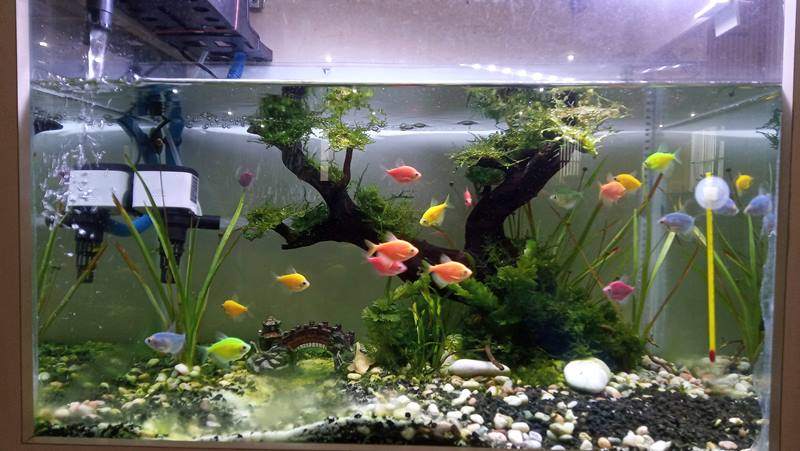

In [16]:
img_target = Image.open('akuarium.jpg')
img_target

#### Abu-Abu

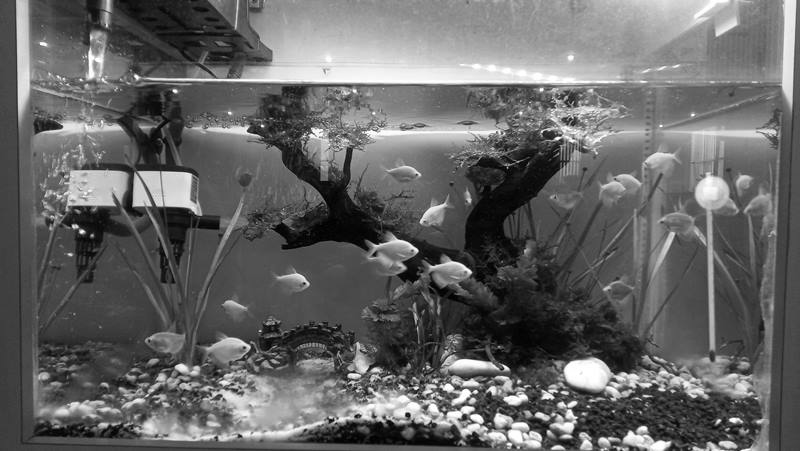

In [17]:
img_gray_target = img_target.convert('L')
img_gray_target

Text(0.5, 1.0, 'Target Grey Histogram')

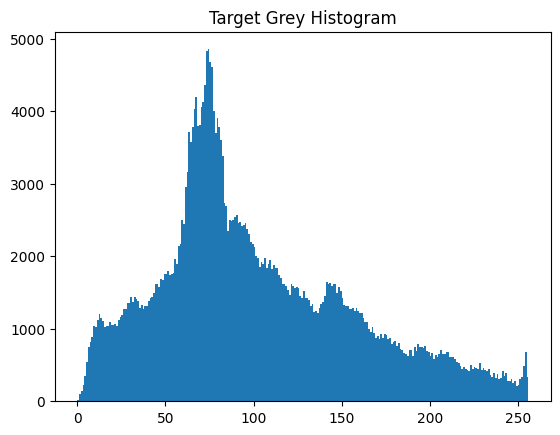

In [18]:
hist_target = img_gray_target.histogram()

plt.stairs(hist_target, fill=True)
plt.title('Target Grey Histogram')

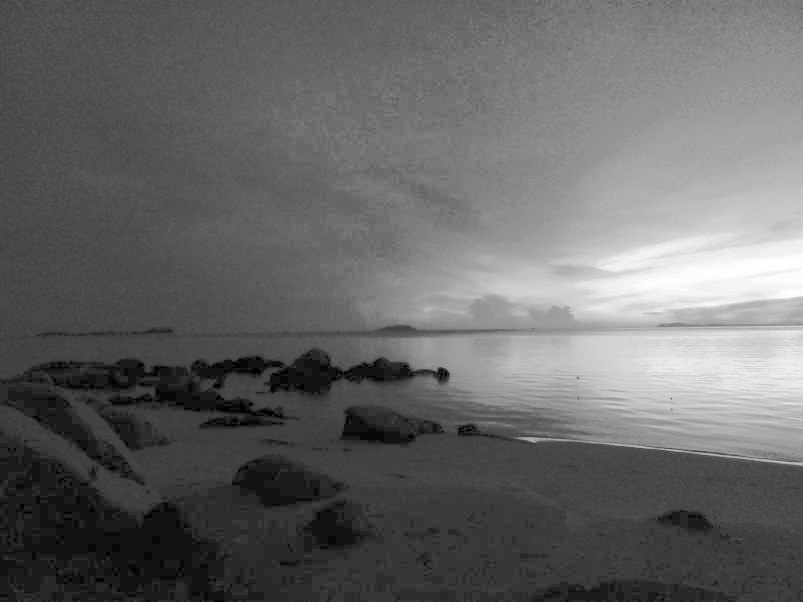

In [19]:
grey_img = img.convert('L')
matched_grey_img = match_histogram_image(grey_img, hist_target)

res_matched_image = Image.fromarray(matched_grey_img.astype('uint8'), 'L')
res_matched_image

Text(0.5, 1.0, 'Grey Result Histogram')

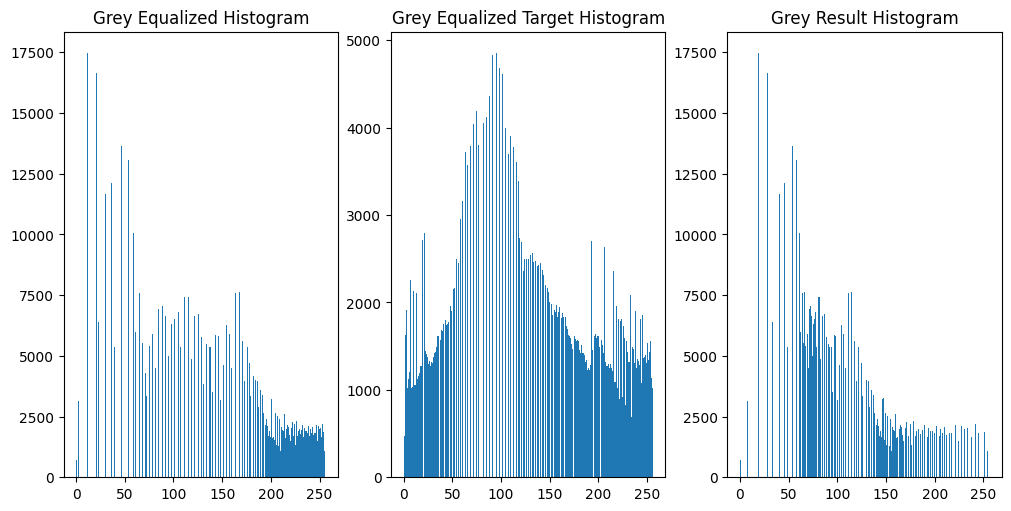

In [20]:
fig, ax = plt.subplots(ncols=3, figsize=(10, 5), layout='constrained')

eq_grey_hist = equalize_histogram(grey_hist)
ax[0].stairs(eq_grey_hist, fill=True)
ax[0].set_title('Grey Equalized Histogram')

ax[1].stairs(equalize_histogram(np.asarray(hist_target)), fill=True)
ax[1].set_title('Grey Equalized Target Histogram')

ax[2].stairs(res_matched_image.histogram(), fill=True)
ax[2].set_title('Grey Result Histogram')

#### RGB

Text(0.5, 1.0, 'Blue Target')

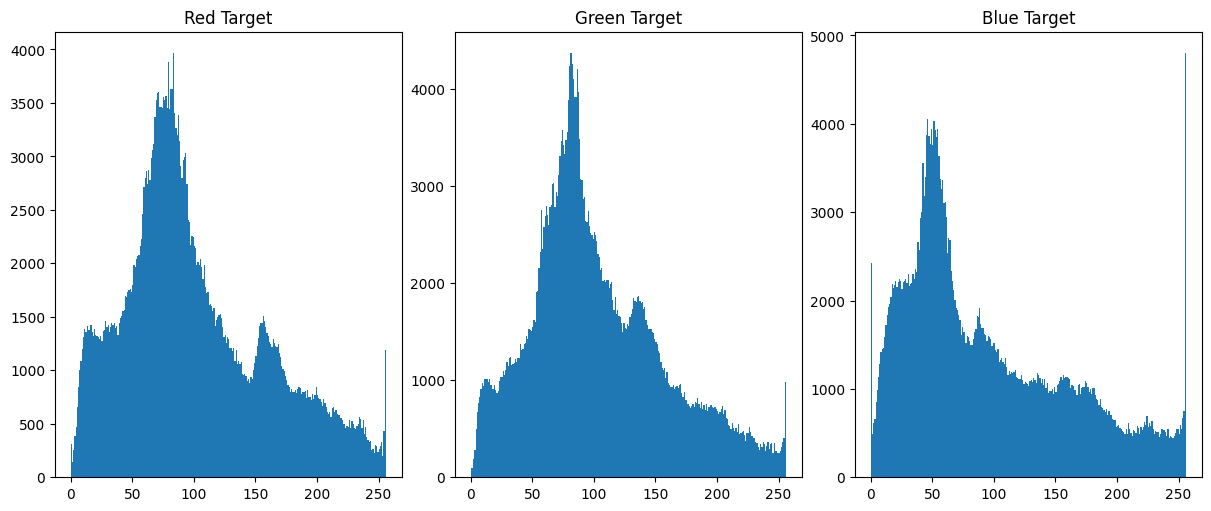

In [21]:
r_target_hist = np.array(img_target.histogram()[:256])
g_target_hist = np.array(img_target.histogram()[256:512])
b_target_hist = np.array(img_target.histogram()[512:])

fig, ax = plt.subplots(ncols=3, figsize=(12, 5), layout='constrained')
ax[0].stairs(r_target_hist, fill=True)
ax[0].set_title('Red Target')

ax[1].stairs(g_target_hist, fill=True)
ax[1].set_title('Green Target')

ax[2].stairs(b_target_hist, fill=True)
ax[2].set_title('Blue Target')

(602, 803, 3)


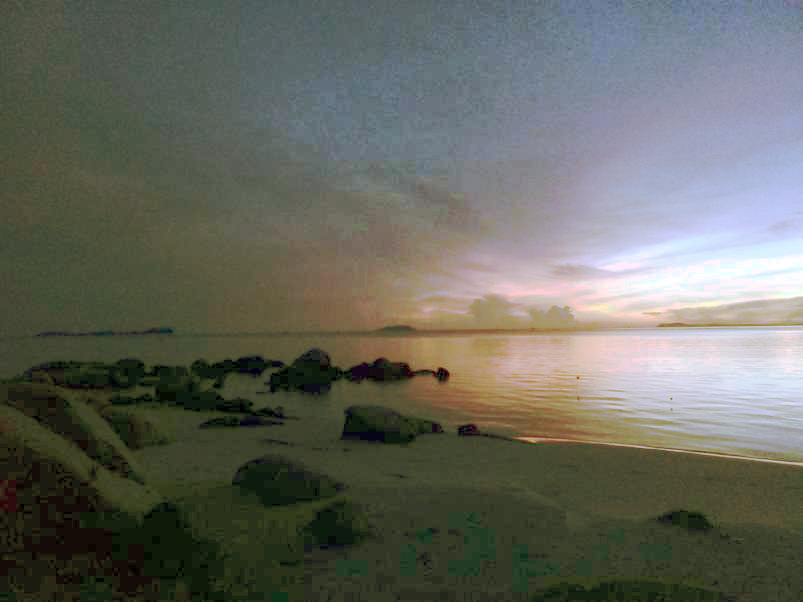

In [22]:
rgb_matching_img = [
    (img.getchannel('R'), r_target_hist),
    (img.getchannel('G'), g_target_hist),
    (img.getchannel('B'), b_target_hist)
]

matched_rgb_img = np.array([match_histogram_image(img, target_hist).T for img, target_hist in rgb_matching_img]).T
print(matched_rgb_img.shape)

Image.fromarray(matched_rgb_img.astype('uint8'), 'RGB')